## Prova Finale Roberto Grassia
### Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data

In [1]:
import os
import dotenv
import sqlalchemy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
urlcovid = r"C:\Users\rgras\Desktop\Python\Prova_finale.csv"
covid = pd.read_csv(urlcovid)

1.Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [2]:
covid.info() #Visualizzo le informazioni del dataframe e metadati

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [3]:
print("La Dimensione del dataframe è:",covid.shape) #Visualizzo la dimensione del dataframe

La Dimensione del dataframe è: (429435, 67)


In [4]:
covid.sample(10) #Visualizzo 15 righe casuali del dataframe

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
365017,LKA,Asia,Sri Lanka,2022-01-31,610103.0,0.0,1173.857,15420.0,0.0,17.286,...,27.0,NaN,3.60,76.98,0.782,21832150,NaN,NaN,NaN,NaN
215862,LTU,Europe,Lithuania,2021-04-01,214027.0,0.0,706.000,3552.0,0.0,10.286,...,38.0,NaN,6.56,75.93,0.882,2750058,NaN,NaN,NaN,NaN
319424,RWA,Africa,Rwanda,2024-07-29,133264.0,0.0,0.000,1468.0,0.0,0.000,...,21.0,4.617,NaN,69.02,0.543,13776702,NaN,NaN,NaN,NaN
277180,NIU,Oceania,Niue,2024-07-31,1074.0,0.0,0.000,0.0,0.0,0.000,...,NaN,NaN,NaN,73.71,NaN,1952,NaN,NaN,NaN,NaN
11650,AGO,Africa,Angola,2024-05-29,107454.0,0.0,0.429,1937.0,0.0,0.000,...,NaN,26.664,NaN,61.15,0.581,35588996,NaN,NaN,NaN,NaN
19776,ABW,North America,Aruba,2023-09-24,44224.0,0.0,0.000,292.0,0.0,0.000,...,NaN,NaN,NaN,76.29,NaN,106459,NaN,NaN,NaN,NaN
339013,OWID_SCT,Europe,Scotland,2023-05-19,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5466000,NaN,NaN,NaN,NaN
387712,TTO,North America,Trinidad and Tobago,2022-10-02,183181.0,584.0,83.429,4207.0,12.0,1.714,...,NaN,89.443,3.00,73.51,0.796,1531043,NaN,NaN,NaN,NaN
165232,OWID_HIC,NaN,High-income countries,2020-02-07,106.0,0.0,10.714,10.0,0.0,0.571,...,NaN,NaN,NaN,NaN,NaN,1250514600,NaN,NaN,NaN,NaN
383470,TKL,Oceania,Tokelau,2020-04-21,0.0,0.0,0.000,0.0,0.0,0.000,...,NaN,NaN,NaN,81.86,NaN,1893,NaN,NaN,NaN,NaN


In [5]:
covid.describe() #Visualizzo le statistiche del dataframe

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,24.568000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,295.089000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,1283.817000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


2. Si chiede di trovare, per ogni continente: 
2a. il numero di casi fin dall'inizio della pandemia

In [6]:
Numero_casi_continente = covid.groupby(["continent"])["new_cases"].sum().sort_values(ascending=False) #Calcolo il numero totale di casi per continente
print(Numero_casi_continente)

continent
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
South America     68811012.0
Oceania           15003468.0
Africa            13146831.0
Name: new_cases, dtype: float64


2b. la percentuale rispetto al totale mondiale del numero di casi

In [7]:
Percentuale_casi_continente = Numero_casi_continente / covid["new_cases"].sum() * 100 #Calcolo la percentuale di casi per continente
print(Percentuale_casi_continente)

continent
Asia             9.170566
Europe           7.691201
North America    3.785823
South America    2.092543
Oceania          0.456255
Africa           0.399795
Name: new_cases, dtype: float64


3. Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati: 

In [8]:
covid["date"] = pd.to_datetime(covid["date"]) #Converto la colonna "date" in formato datetime

In [9]:
filtro_italia2022 = covid[(covid["location"] == "Italy") & (covid["date"].dt.year == 2022)]  # Filtro il dataframe per l'Italia nel 2022

In [11]:
filtro_italia2022.isnull().sum() #Controllo i valori nulli nel dataframe filtrato

iso_code                                     0
continent                                    0
location                                     0
date                                         0
total_cases                                  0
                                          ... 
population                                   0
excess_mortality_cumulative_absolute       313
excess_mortality_cumulative                313
excess_mortality                           313
excess_mortality_cumulative_per_million    313
Length: 67, dtype: int64

In [13]:
covid_italia2022_totali = filtro_italia2022[["date", "total_cases"]]  # Seleziono le colonne desiderate

In [16]:
covid_italia2022_totali.isnull().sum()  # Controllo i valori nulli nel dataframe filtrato

date           0
total_cases    0
dtype: int64

3a. L'evoluzione del casi totali dall'inizio alla fine dell'anno

In [14]:
covid_italia2022_totali.sample(5).sort_values(by="total_cases")

,date,total_cases
186130,2022-05-09,16767773.0
186244,2022-08-31,21788862.0
186270,2022-09-26,22284812.0
186285,2022-10-11,22781293.0
186306,2022-11-01,23531023.0


<Axes: title={'center': 'Casi totali in Italia nel 2022'}, xlabel='date'>

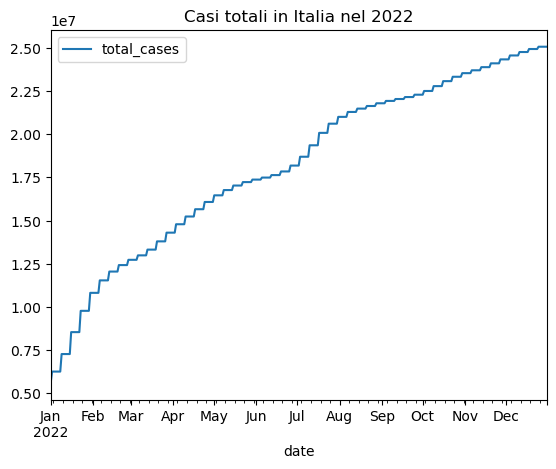

In [15]:
covid_italia2022_totali.plot(x="date", y="total_cases", title="Casi totali in Italia nel 2022", kind = "line") 

3b. Il numero di nuovi casi rispetto alla data

In [21]:
covid_italia2022_nuovi = filtro_italia2022[["date", "new_cases"]]  # Seleziono le colonne desiderate

In [18]:
covid_italia2022_nuovi.sample(5).sort_values(by="date")

,date,new_cases
186003,2022-01-02,644604.0
186197,2022-07-15,0.0
186198,2022-07-16,0.0
186248,2022-09-04,136211.0
186300,2022-10-26,0.0


<Axes: title={'center': 'Nuovi casi in Italia nel 2022'}, xlabel='date'>

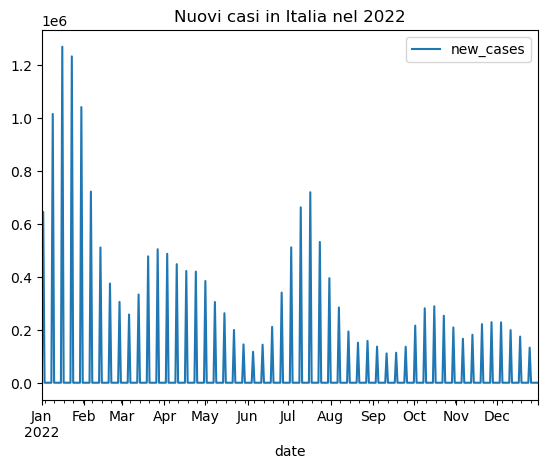

In [ ]:
covid_italia2022_nuovi.plot(x="date", y="new_cases", title="Nuovi casi in Italia nel 2022", kind = "line")

4. Riguardo le nazioni di Italia, Germania e Francia tra Maggio 2022 e Aprile 2023

In [28]:
covid_paesi_22_23 = covid[covid["date"].between("2022-05-01", "2023-04-30")] # Filtro il dataframe per il periodo desiderato
covid_paesi_22_23 = covid_paesi_22_23[covid_paesi_22_23["location"].isin(["Italy", "Germany", "France"])]  # Filtro il dataframe per i paesi desiderati

In [29]:
covid_paesi_22_23.isna().sum() #Controllo se ci sono valori nulli nel dataframe

iso_code                                     0
continent                                    0
location                                     0
date                                         0
total_cases                                  0
                                          ... 
population                                   0
excess_mortality_cumulative_absolute       936
excess_mortality_cumulative                936
excess_mortality                           936
excess_mortality_cumulative_per_million    936
Length: 67, dtype: int64

In [26]:
covid_paesi_22_23.isnull().sum().sum() #Controllo la quantità di valori nulli nel dataframe

16332

In [34]:
covid_paesi_22_23["icu_patients"].isnull().sum() #Controllo i valori nulli nella colonna "icu_patients"

0

In [33]:
covid_paesi_22_23 = covid_paesi_22_23[covid_paesi_22_23["icu_patients"].notna()] #Rimuovo le righe con valori nulli nella colonna "icu_patients"
covid_paesi_22_23 = covid_paesi_22_23[(covid_paesi_22_23["icu_patients"] > 0)]

In [ ]:
covid_paesi_22_23["icu_patients"].isnull().sum() #Controllo i valori nulli nella colonna "icu_patients"

In [35]:
covid_paesi_22_23.isna().sum() #Controllo se ci sono valori nulli eliminati

iso_code                                     0
continent                                    0
location                                     0
date                                         0
total_cases                                  0
                                          ... 
population                                   0
excess_mortality_cumulative_absolute       911
excess_mortality_cumulative                911
excess_mortality                           911
excess_mortality_cumulative_per_million    911
Length: 67, dtype: int64

In [36]:
covid_paesi_22_23.isnull().sum().sum() #Controllo la quantità di valori nulli nel dataframe

15602

4a. Mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)

Text(0.5, 1.0, 'Numero di pazienti in terapia intensiva per paese')

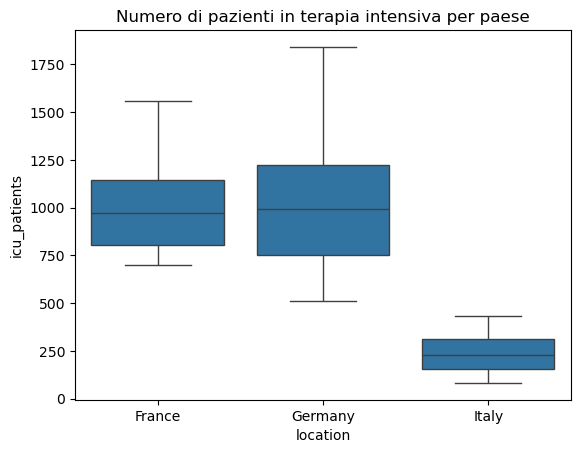

In [37]:
sns.boxplot(data=covid_paesi_22_23, x="location", y="icu_patients") # Visualizzo i dati con un boxplot
plt.title("Numero di pazienti in terapia intensiva per paese") # Aggiungo un titolo al grafico

4b. Scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante

##### Dal grafico che la Germania ha avuto un indice maggiore di Icu seguita da Francia e Italia. Osserviamo il box che va dal 1° quartile e 3° quartile(25% a 75%)
##### Germania:Tra 750 e 1250 con baffo superiore di 1750; Francia:750 e 1200 con baffo superiore di 1500;
##### Italia: Tra 150 e 350 con baffo superiore leggermente al di sotto 500

5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:

In [41]:
covid_paesi_21 = covid[covid["date"].dt.year == 2021]  # Filtro il dataframe per il periodo desiderato
covid_paesi_21 = covid_paesi_21[covid_paesi_21["location"].isin(["Italy", "Germany", "France", "Spain"])]  # Filtro il dataframe per i paesi desiderati

5a Mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospedalizzati per ognuna colonna (colonna hosp_patients)

In [42]:
covid_paesi_21_hosp = covid_paesi_21.groupby(["location"])["hosp_patients"].sum() # Calcolo il numero totale di pazienti in ospedale per paese
print(covid_paesi_21_hosp)

location
France     6008717.0
Germany          0.0
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64


Text(0.5, 1.0, 'Numero totale di pazienti in ospedale per paese')

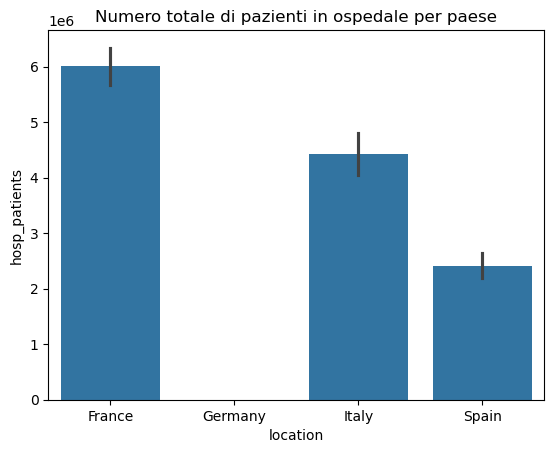

In [40]:
sns.barplot(data=covid_paesi_21, x="location", y="hosp_patients", estimator=sum) # Visualizzo i dati con un barplot
plt.title("Numero totale di pazienti in ospedale per paese") # Aggiungo un titolo al grafico

5b. Se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno.

##### La colonna hosp_patients della Germania presenta solo dati nulli. La sostituzione risulterebbe inappropriata in quanto
##### non si avrebbe riferimento per un ipotetico metodo di sostituzione

In [46]:
covid_germany = covid_paesi_21[covid_paesi_21["location"] == "Germany"] # Filtro per controllo dati Germania per verifcare lo 0 precedente
covid_germany["hosp_patients"].isna().sum() #Controllo se ci sono valori nulli nel dataframe

365

In [55]:
print(covid_germany[["date", "hosp_patients"]].sample(20)) # Verfica random di 20 righe per Germania

             date  hosp_patients
140935 2021-06-12            NaN
140997 2021-08-13            NaN
141031 2021-09-16            NaN
141072 2021-10-27            NaN
140883 2021-04-21            NaN
140781 2021-01-09            NaN
141022 2021-09-07            NaN
140805 2021-02-02            NaN
141041 2021-09-26            NaN
140908 2021-05-16            NaN
140960 2021-07-07            NaN
141117 2021-12-11            NaN
140896 2021-05-04            NaN
140808 2021-02-05            NaN
141082 2021-11-06            NaN
140802 2021-01-30            NaN
141120 2021-12-14            NaN
140966 2021-07-13            NaN
141070 2021-10-25            NaN
140840 2021-03-09            NaN
